# Numpy Package

In [4]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
import pandas as pd
import seaborn as sns

# magic command
%matplotlib inline
#set figure size
plt.rcParams['figure.figsize'] = [10, 5]

# 1. Overall purpose of numpy.random package

The purpose of the numpy.random package is to generate pseudo random numbers. This is acheived by passing arguments to numpy that determine the shape and size of the random array. These parameters allow numpy to generate seemingly random numbers with a deterministic input. The overall shape and output of the numpy.random package can be determined by the use of in-built functions which will be explored further in this assignment.

# 2. Simple Random Data and Permutations functions

## Simple Random Data


## numpy.random.rand()
numpy.random.rand() returns random values in a given shape (d0, 1, ..., dn). The parameters provide to the function determine the number of samples in the array, as well as the number of arrays. If no parameters are provided than the function returns a single random sample. The samples are returned in a uniform distribution in the half open interval [0.0, 1.0).

## numpy.random.randn()
The numpy.random.randn() function is similar to the previous function insofar as the parameters are the same. However, the function returns the samples in the standard normal distribution.

### Example

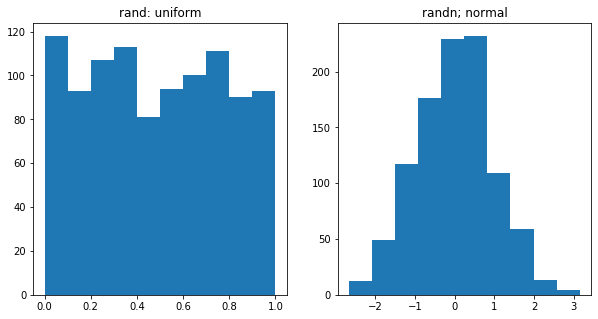

In [33]:
# rand and randn functions with same sample size
uniform = np.random.rand(1000)
normal = np.random.randn(1000)

# histogram of rand function
plt.subplot(1, 2, 1)
plt.hist(uniform)
plt.title('rand: uniform')
plt.show

# histogram of randn function
plt.subplot(1, 2, 2)
plt.hist(normal)
plt.title('randn; normal')
plt.show()

### numpy.random.random_integers()

In [6]:
np.random.random_integers(10000, size = (3))

/Users/adamnihill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 10000 + 1) instead
  """Entry point for launching an IPython kernel.


array([ 4185,  1126, 10000])

Results can be imagined a die roll

/Users/adamnihill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 6 + 1) instead
  
/Users/adamnihill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


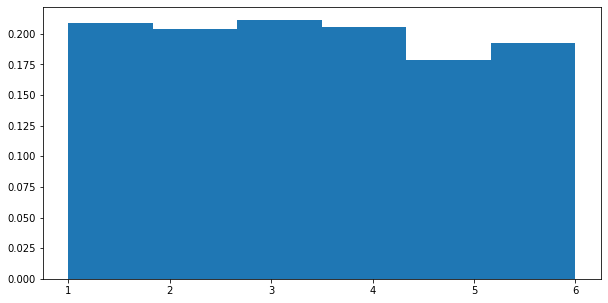

In [7]:
#1000 dice rolls
d1 = np.random.random_integers(1, 6, 1000)
plt.hist(d1, 6, normed=True)
plt.show()

### numpy.random.randint

/Users/adamnihill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


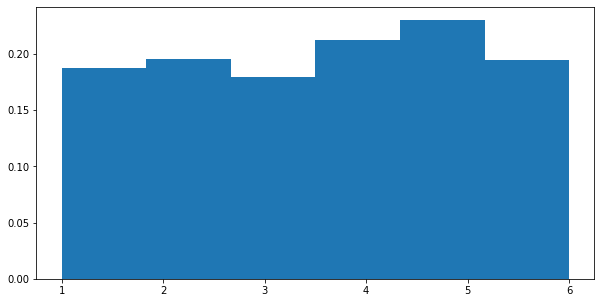

In [8]:
d6 = np.random.randint(1, 7, size = 1000)
plt.hist(d6, 6, normed=True)
plt.show()

## Permutations

### Shuffle
The shuffle function changes the order of sequence by shuffling it's contents.

In [9]:
# array of 10 numbers
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
# shuffle the array
np.random.shuffle(arr)

In [11]:
#shuffled output
arr

array([2, 0, 4, 1, 7, 8, 9, 5, 3, 6])

### Permutation
The permutation function outputs a randomly ordered array in a given size.

In [12]:
# random permutation with the size of 10
np.random.permutation(10)

array([2, 4, 7, 8, 5, 6, 0, 9, 3, 1])

In [13]:
arr_2 = np.arange(9).reshape((3, 3))
np.random.permutation(arr_2)

array([[3, 4, 5],
       [6, 7, 8],
       [0, 1, 2]])

## numpy.random.random_sample()
numpy.random.random_sample returns float (floting point real numbers) in continuous uniform destribution. The interval of which can be specified.

### Example 

In [14]:
np.random.random_sample()

0.6219986227665365

In [15]:
# return 3 by 3 array
np.random.random_sample((3, 2))

array([[0.93202854, 0.59047223],
       [0.14571455, 0.61586818],
       [0.26960996, 0.1672305 ]])

## numpy.random.choice()
numpy.random.choice() returns random sample of one dimensional array.

### Example

In [16]:
# np.arange(5) and size of 8
np.random.choice(5, 8)

array([1, 3, 0, 3, 0, 3, 4, 0])

# 3. Distributions

## Geometric Distribution

[Bernoulli Trial](https://en.wikipedia.org/wiki/Bernoulli_trial)

A Bernoulli Trial is a random experiment where the results are either success or failure. Essentially, a Bernoulli Trial deals with "yes" or "no" questions. A straight forward example of this is a coin flip. The result can either be heads or tails.

The geometric distribution models the number of trials must be run in order to provide a successful result.


In [17]:
# 100 coin flips with a probability rate of 50%
heads = np.random.geometric(p=0.5, size=100)
(heads == 1).sum()/100.

0.54

# Poisson  Distribution
The Poisson distribution describes the probability of a given number of events occuring in a fixed interval. These events occur and a constant rate and independently of the previous event. That is to say the occurence of a single event does not predict the probility of a future event.

A practical example of this can be seen when measuring the rate of incoming calls in a call centre.

In [22]:
# set Business hours 
bh = pd.offsets.BusinessHour()
# date range for two work days 
rng = pd.date_range('10/07/2019', periods=16, freq=bh)
# simulated data for number of inbound calls in work week
# average number of events is 100 
ts = pd.DataFrame(np.random.poisson(100, len(rng)), index=rng, columns=['Inbound Calls'])
ts

,Inbound Calls
2019-10-07 09:00:00,122
2019-10-07 10:00:00,84
2019-10-07 11:00:00,110
2019-10-07 12:00:00,99
2019-10-07 13:00:00,116
2019-10-07 14:00:00,107
2019-10-07 15:00:00,89
2019-10-07 16:00:00,96
2019-10-08 09:00:00,94
2019-10-08 10:00:00,106


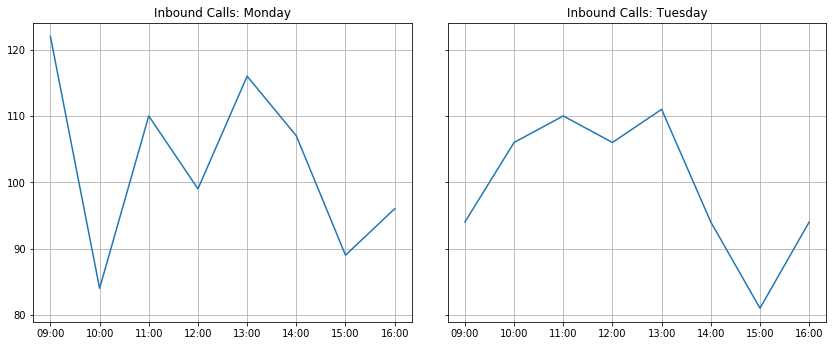

In [23]:
# sliced data frame in sections for monday and tuesday 
mon = ts.loc['2019-10-07 09:00:00':'2019-10-07 16:00:00']
tue = ts.loc['2019-10-08 09:00:00':'2019-10-08 16:00:00']

# created subplots sharing same y-axis
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(12, 5))
fig.tight_layout(pad=2)

# plot of mondays calls 
ax1.plot(mon)
ax1.grid()
ax1.set_title('Inbound Calls: Monday')
#set  x-axis date format to just include hours and minutes 
ax1.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))

# plot of tuesdays calls 
ax2.plot(tue)
ax2.grid()
ax2.set_title('Inbound Calls: Tuesday')
ax2.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))

plt.show()

## Triangular Distribution
The Triangular Distribution is useful as a means of prediction when limited information is known. There are three parameters of the triangular distribution, the best-case estimate, the worst case estimate and the most likely estimate.

There are three parameters to the triangular distribution, a lower limit(a) an upper limit(b), the mode(c), and the size of the output, where a ≤ c ≤ b.

The following example details the expected sales of a company over a month where the minimum expected sales is to the vale of €1000, the maximum expected sales is €6000, and the realistic value of expected sales is €3000. 

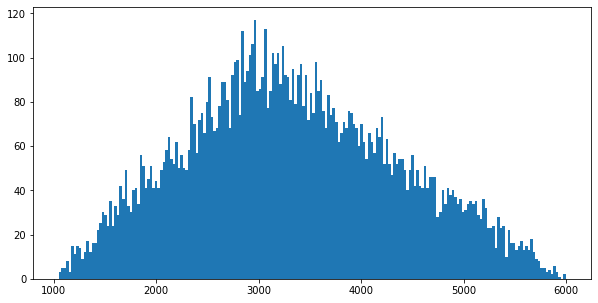

In [48]:
# Triangualr distribution where a=1000, b=6000, c=3000, with size of 10000
plt.hist(np.random.triangular(1000, 3000, 6000, 10000), bins=200)
plt.show()

## Standard_t Distribution


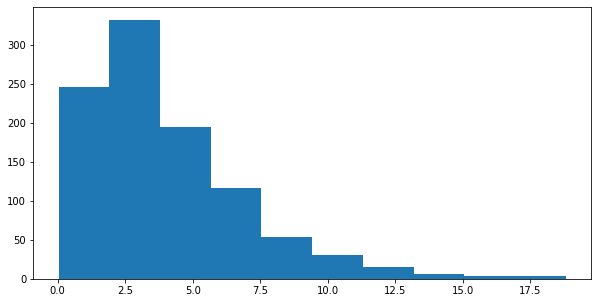

## Dirichlet Distribution

https://towardsdatascience.com/dirichlet-distribution-a82ab942a879

<blockquote>The Dirichlet distribution Dir(α) is a family of continuous multivariate probability distributions parameterized by a vector α of positive reals. It is a multivariate generalisation of the Beta distribution. Dirichlet distributions are commonly used as prior distributions in Bayesian statistics.</blockquote>



In [19]:
x = np.random.dirichlet((12, 10, 3))

In [20]:
x

array([0.67351121, 0.26650952, 0.05997927])

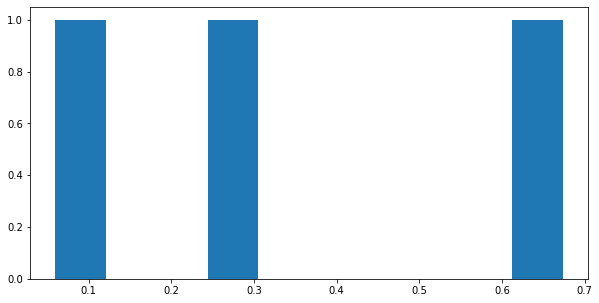

In [21]:
plt.hist(x)
plt.show()

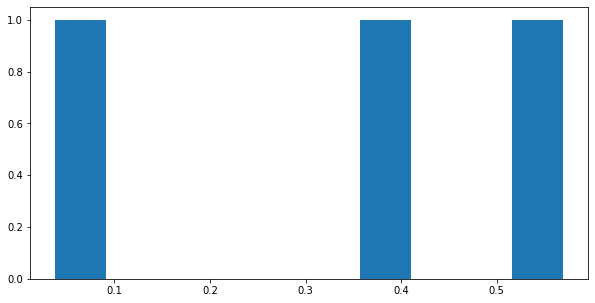

In [22]:
y = np.random.dirichlet((1, 1, 1))
plt.hist(y)
plt.show()

# 4. Seeds

In [63]:
rng = np.random.RandomState(9)

In [69]:
rng.poisson(5, 7)

array([ 5, 12,  6,  6,  9,  5,  6])